## Exercise Sheet 6

#### **Submission** <br> June 24th 12:00 p.m. (via studIP)
#### **Defense** <br> June 27th 8:00 - 11:00 a.m

A **maximum** of 5 percentage points bonus for the exam can be achieved with each sheet if:
1) at least 60% of the worksheet has been completed correctly 
2) the worksheet has been successfully defended (explained to the tutors).
*Conditions*:
- Each group must register for a slot in studIP for the defense.
- Successful defense means that a team member selected by us explains the solution and answers questions about it.
- ChatGPT and other tools may be used, but must be cited.
- The code must be explained without any aids.
- We will not only evaluate the correctness of the results, but also whether the code is efficient, easy to understand, tidy and well documented.
- Each group submits only one solution as a zip file, which is provided with the name and student number of a group member. For example, `mustermann_12345678.zip`. 

## Exercise 1 (10%)

Load the Titanic Dataset as a Pandas DataFrame. Answer the following questions by editing the Pandas dataframe with appropriate functions and transformations:

#### 1) (5%) What is the average ticket price per class? First create a barplot using `seaborn`, then determine the average value using the `.groupby()` method and add this value to the respective bar in the plot.

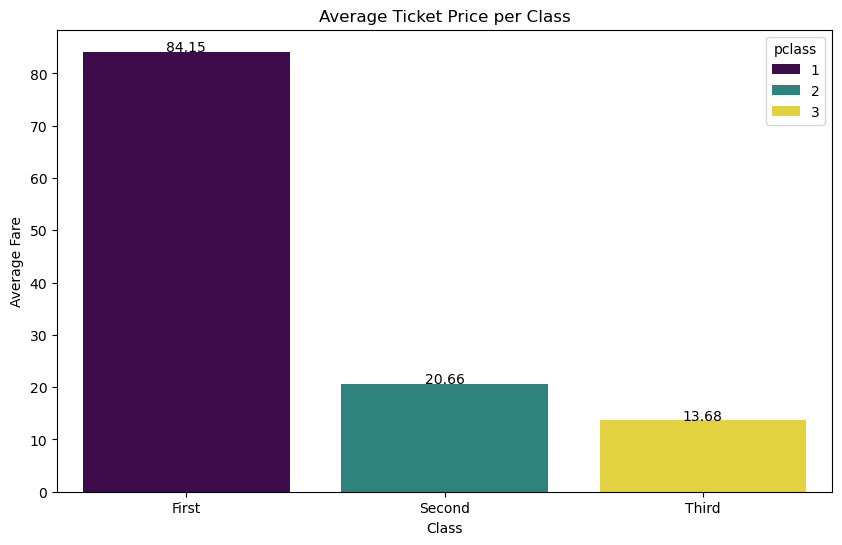

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic.csv")

# Calculate the average fare per class
average_fare_per_class = titanic_df.groupby('pclass')['fare'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=average_fare_per_class, x='pclass', y='fare', hue='pclass', palette="viridis")

# Annotate bars with the average fare values
for index, row in average_fare_per_class.iterrows():
    barplot.text(row['pclass']-1, row['fare'], round(row['fare'], 2), color='black', ha="center")

plt.title('Average Ticket Price per Class')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.xticks([0, 1, 2], ['First', 'Second', 'Third'])
plt.show()

#### 2) (5%) What is the median ticket price per class? Do the same as in the previous task and explain the difference between average and median based on your results.
<br> *Note: `sns.barplot()` has an argument `estimator` that might be useful.*

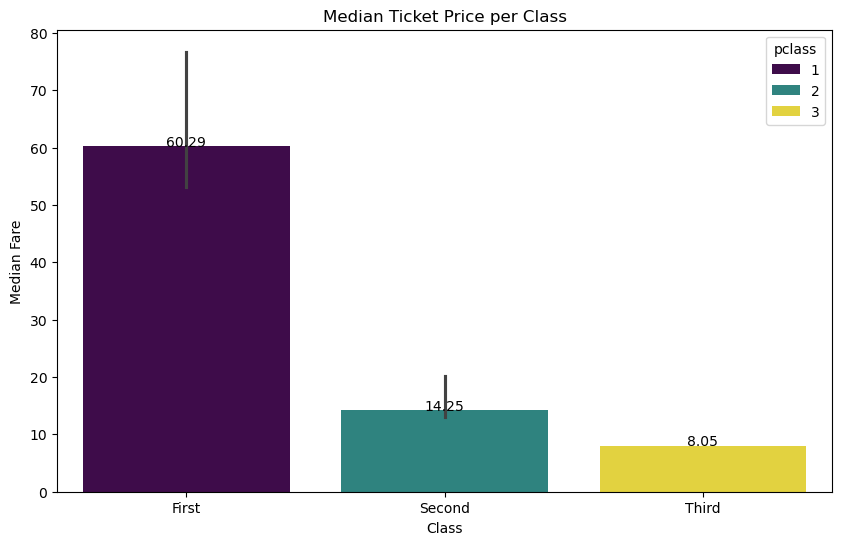

In [2]:
import numpy as np

median_fare_per_class = titanic_df.groupby('pclass')['fare'].median().reset_index()

# barplot for median fares using np.median as the estimator
plt.figure(figsize=(10, 6))
barplot_median = sns.barplot(data=titanic_df, x='pclass', y='fare', estimator=np.median, hue='pclass', palette="viridis")

for index, row in median_fare_per_class.iterrows():
    barplot_median.text(row['pclass']-1, row['fare'], round(row['fare'], 2), color='black', ha="center")

plt.title('Median Ticket Price per Class')
plt.xlabel('Class')
plt.ylabel('Median Fare')
plt.xticks([0, 1, 2], ['First', 'Second', 'Third'])
plt.show()

Average vs. Median:

- Average (Mean): The mean ticket price is calculated by summing all the ticket prices and dividing by the number of passengers. It is sensitive to extremely high or low values (outliers), which can skew the average.
- Median: The median ticket price is the middle value when all ticket prices are sorted in ascending order. It is less affected by outliers and therefore provides a better central tendency measure for skewed distributions.

Based on the Results:

- For First Class, the average fare (usd84.15) is significantly higher than the median fare (usd60.29), indicating the presence of some very high ticket prices (outliers) that increase the average.
- For Second Class, the average fare (usd20.66) is somewhat higher than the median fare (usd14.25), suggesting a moderate skew due to higher ticket prices.
- For Third Class, the average fare (usd13.68) is close to the median fare (usd8.05), indicating a more balanced distribution with fewer extreme values.

---

## Exercise 2 (40%)

#### 1. (10%) Use the package `scipy` to define a Gaussian distribution with mean 10 and standard deviation 3 and draw n = [100, 1000, 10000] samples from this distribution. Plot these sampling distributions as histograms in a 3-part figure. Then plot the PDF of the distribution onto the histograms.

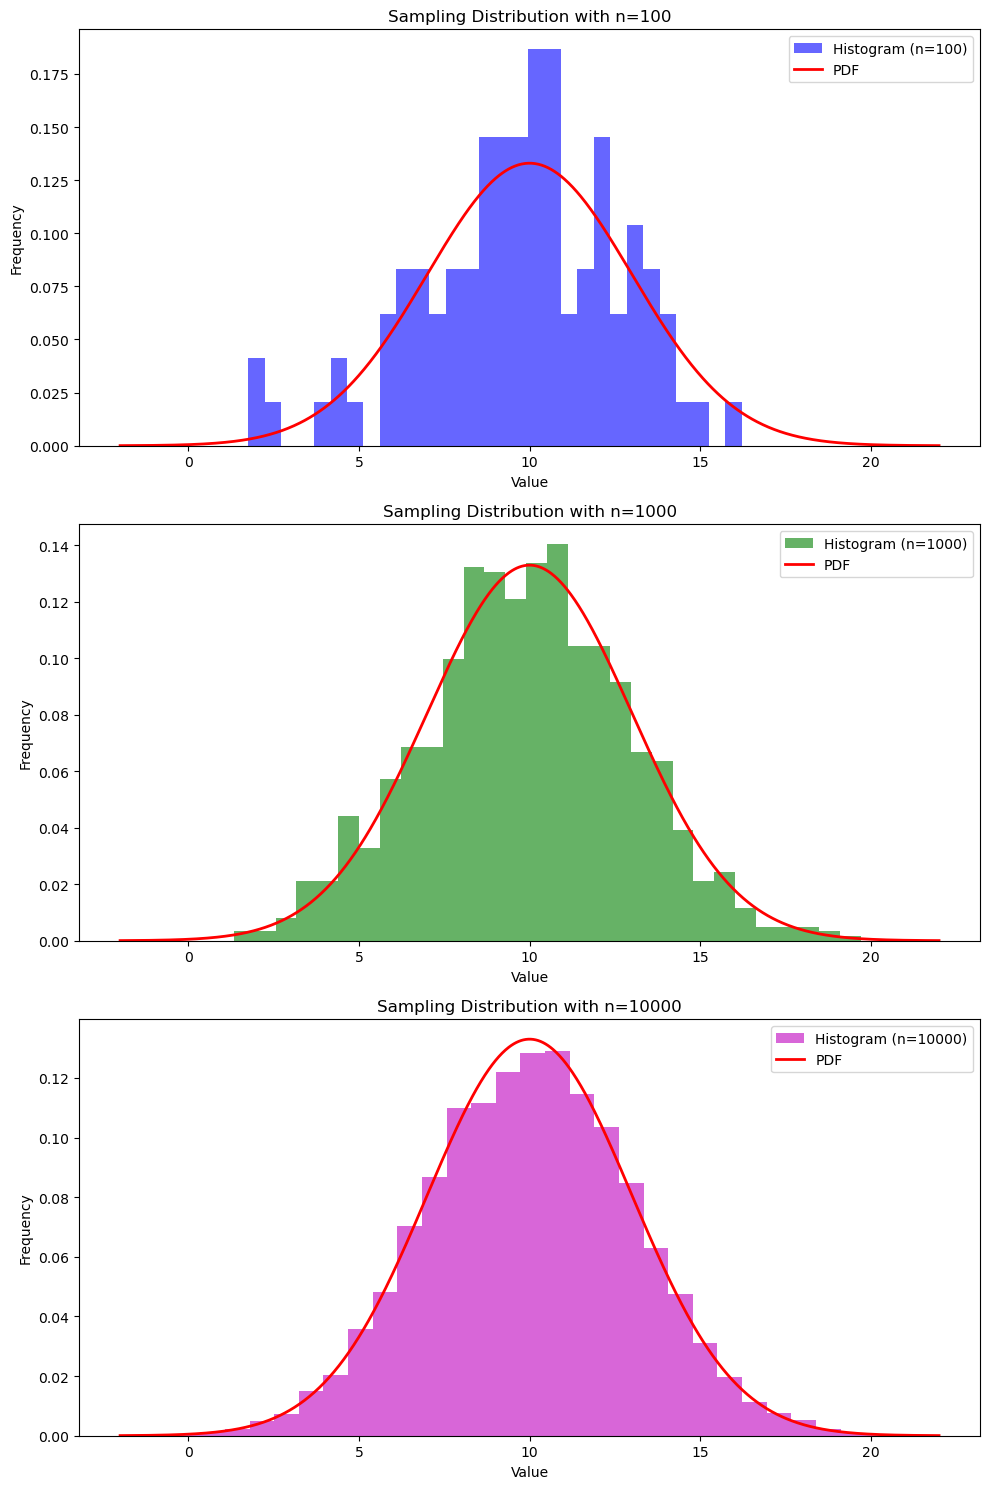

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mean = 10
std_dev = 3

sample_sizes = [100, 1000, 10000]

samples_100 = norm.rvs(loc=mean, scale=std_dev, size=100)
samples_1000 = norm.rvs(loc=mean, scale=std_dev, size=1000)
samples_10000 = norm.rvs(loc=mean, scale=std_dev, size=10000)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, loc=mean, scale=std_dev)

axs[0].hist(samples_100, bins=30, density=True, alpha=0.6, color='b', label='Histogram (n=100)')
axs[0].plot(x, pdf, 'r-', lw=2, label='PDF')
axs[0].set_title('Sampling Distribution with n=100')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].legend()

axs[1].hist(samples_1000, bins=30, density=True, alpha=0.6, color='g', label='Histogram (n=1000)')
axs[1].plot(x, pdf, 'r-', lw=2, label='PDF')
axs[1].set_title('Sampling Distribution with n=1000')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].legend()

axs[2].hist(samples_10000, bins=30, density=True, alpha=0.6, color='m', label='Histogram (n=10000)')
axs[2].plot(x, pdf, 'r-', lw=2, label='PDF')
axs[2].set_title('Sampling Distribution with n=10000')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')
axs[2].legend()

plt.tight_layout()
plt.show()

#### 2. (5%) What is the difference between the standard deviation of the sampling distribution and the standard deviation of the underlying Gaussian distribution? Explain how this difference shows up in your empirical results.


The standard deviation of the underlying Gaussian distribution ($\sigma$) represents the spread of the individual data points around the mean of the population. In this case, it is given as 3.

The standard deviation of the sampling distribution measures the variability of the sample means around the true population mean. This is given by:
$\text{Standard Error} = \frac{\sigma}{\sqrt{n}}$

This formula shows that the standard error decreases as the sample size $n$ increases. Essentially, with larger sample sizes, the sample means are expected to be closer to the population mean, reducing the variability of the sample means.

### Empirical Results:

In the histograms:

1. **Small Sample Size (n = 100):**
   - The histogram is broader and less smooth, reflecting greater variability in the sample means. more precise estimates of the population mean.

   - The broader shape indicates a higher standard error, meaning the sample means are more spread out around the true mean.

2. **Medium Sample Size (n = 1000):**
   - The histogram is narrower and smoother compared to $n = 100$.
   - This shows a reduced standard error, indicating that the sample means are less spread out and more tightly clustered around the true mean.

3. **Large Sample Size (n = 10000):**
   - The histogram is the narrowest and smoothest of all three.
   - This reflects the smallest standard error, meaning the sample means are very close to the true mean and show minimal spread.

### Visual Representation:

- **Broader Histograms (Small $n$)**: Larger variability in sample means, higher standard error.
- **Narrower Histograms (Large $n$)**: Smaller variability in sample means, lower standard error.

As the sample size increases, the histograms become more concentrated around the mean (10), and their shape increasingly resembles the PDF of the Gaussian distribution, illustrating the reduced variability in the sample means.


#### 3. (10%) Load the numpy array `sample.npy`. Calculate the 95% confidence interval for the mean via bootstrapping and compare it with the empirical value.

In [7]:
from scipy.stats import bootstrap
# 2.3) load sample.npy
sample = np.load("sample.npy")
empirical_mean = sample.mean()
sample = (sample,) # convert to sequence

# calculate 95% bootstrapped confidence interval for mean
bootstrap_ci = bootstrap(
    sample, np.mean, confidence_level=0.95, random_state=1, method="percentile"
)

print(f"95% confidence interval for mean: {bootstrap_ci.confidence_interval}")
print(f"Empirical mean: {empirical_mean}")

95% confidence interval for mean: ConfidenceInterval(low=4.959644753849567, high=6.063943023432714)
Empirical mean: 5.508745991807496


#### 4. (15%) The null hypothesis is now that the mean is equal to 5. The alternative hypothesis is that it is not equal to 5. Would you reject the null hypothesis? Use bootstrapping.

In [10]:
null_hypothesis_mean = 5
shifted_sample = sample[0] - null_hypothesis_mean  # Shift the data to center it around 0

# Perform bootstrapping
bootstrap_results = bootstrap(
    (shifted_sample,),
    np.mean,
    confidence_level=0.95,  # 95% confidence for a two-tailed test
    n_resamples=10000,       # Generate 10000 bootstrap samples
    random_state=1,
    method="percentile",
)

# We get the critical values (2.5% and 97.5% percentiles)
lower_critical_value = bootstrap_results.confidence_interval[0]
upper_critical_value = bootstrap_results.confidence_interval[1]

# Test statistic: Absolute difference between empirical mean and null hypothesis mean
observed_test_statistic = abs(empirical_mean - null_hypothesis_mean)

# Decision
if observed_test_statistic > upper_critical_value or observed_test_statistic < lower_critical_value:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


## Exercise 3 (50%)

#### We want to know whether the groups in this tutorial need the same amount of time to solve the homework. To do this, we measured the times of 2 of the groups over the semester: 

group1 = [6.2, 7.1, 1.5, 2.3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
group2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]
Use a significance level of 0.05 in this task. You can do all hypothesis testing with the help of `scipy`.

#### 1. (5%) What is H0 and H1? Are the groups independent or dependent (paired vs. unpaired)

1. H0 (Null Hypothesis): The median time to solve homework is the same for both groups.
2. H1 (Alternative Hypothesis): The median time to solve homework is different for the two groups.

The groups are independent (unpaired) because there is no inherent pairing or matching between the individuals in group1 and group2.

#### 2. Test the data for the following assumptions. You can also use your own suitable hypothesis tests for this purpose.

##### a) (15%) The data sets of both groups follow a normal distribution

In [11]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt

group1 = [ 6.2, 7.1, 1.5, 2.3, 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1 ]
group2 = [ 2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2, 3.4 ]

alpha = 0.05

_, p_value_group1 = shapiro(group1)
_, p_value_group2 = shapiro(group2)

print(f"Shapiro-Wilk Test (Group 1): p-value = {p_value_group1:.4f}")
print(f"Shapiro-Wilk Test (Group 2): p-value = {p_value_group2:.4f}")

if p_value_group1 > alpha and p_value_group2 > alpha:
    print("We cannot reject the null hypothesis of normality for both groups.")
else:
    print("At least one of the groups does not follow a normal distribution.")

Shapiro-Wilk Test (Group 1): p-value = 0.0076
Shapiro-Wilk Test (Group 2): p-value = 0.0005
At least one of the groups does not follow a normal distribution.


##### b) (15%) The data sets of both groups have the same standard deviation (iid. data)

In [15]:
from scipy.stats import levene
_, p_value_levene = levene(group1, group2)

print(f"Levene's Test: p-value = {p_value_levene:.4f}")

if p_value_levene > alpha:
    print("We cannot reject the null hypothesis of equal variances.")
else:
    print("The groups have significantly different variances.")

Levene's Test: p-value = 0.4727
We cannot reject the null hypothesis of equal variances.


#### 3. (15%) Based on the results from 1. and 2., what type of hypothesis test do you need for this task? Run the test.

Our data has the following features, as seen in `1.` and `2.`:

- Non-Normality: At least one group's data does not follow a normal distribution.
- Ordinal: Homework completion times can be ordered from shortest to longest.
- Independent Groups: The two groups are not related or paired in any way.

Considering this, an appropriate hypothesis test would be the Mann-Whitney U test.

The Mann-Whitney U test is a non-parametric test that effectively handles non-normal, ordinal data from independent groups, making it well-suited for analyzing the differences in homework completion times between our two groups.


Mann-Whitney U Test: p-value = 0.6915
Fail to reject the null hypothesis. There is no significant difference in the median time to complete homework between the two groups.


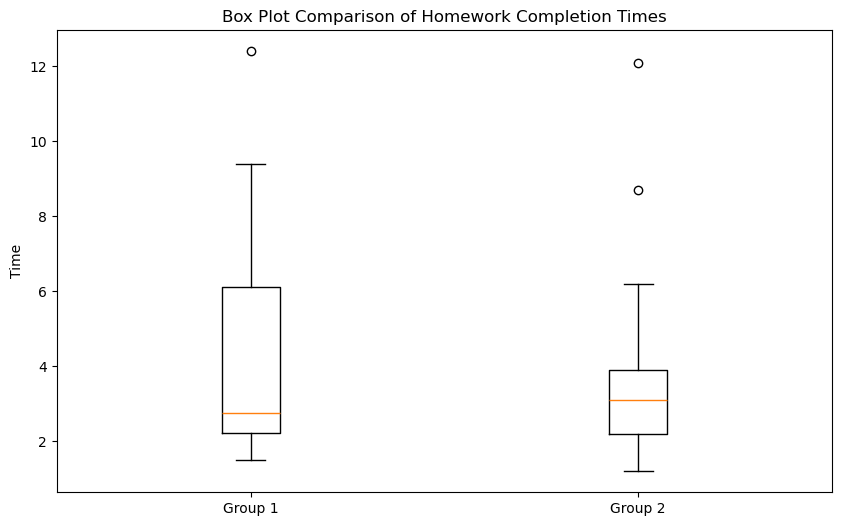

In [14]:
from scipy.stats import mannwhitneyu
_, p_value_mannwhitneyu = mannwhitneyu(group1, group2)
print(f"\nMann-Whitney U Test: p-value = {p_value_mannwhitneyu:.4f}")

if p_value_mannwhitneyu > alpha:
    print(
        "Fail to reject the null hypothesis. There is no significant difference in the median time to complete homework between the two groups."
    )
else:
    print(
        "Reject the null hypothesis. There is a significant difference in the median time to complete homework between the two groups."
    )

# Box plots for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group1, group2], labels=["Group 1", "Group 2"])
plt.title("Box Plot Comparison of Homework Completion Times")
plt.ylabel("Time")
plt.show()